Description:

Write a Notebook that demonstrates that you, can perform data analysis on some
data. I will allow a lot of flexibility in this project, so that you can use it as an
opportunity to do something that is useful for your work.

If you cannot think of a project to do you may Analysis the wind speed around the
country with a view to windfarms:
1.
• You may look for your own source of historic weather information, and/or
use the Met Eireann one (Historical Data - Met Éireann - The Irish
Meteorological Service). Click on the download button to get a zip file that
contains a CSV file.
2.
• You may need to clean and normalize the data before doing analysis
• Questions you can ask:
o How much wind power is there at a particular location?
▪ This is quite open ended, is this just the mean wind speed for
an hour/day/month/year, or should you take into account that
there are wind ranges that the windfarms can operate in. (min
max speeds)
▪ Some analysis of what power when would be useful (time of
day/year)

o Are the wind speeds likely to be the same in 10 years in the future? ie
is there a trend in recorded wind speeds over the last few decades.
o Is there any other weather metric worth analyzing (eg rain, temp)
o What will the power output of the windfarms in Ireland be like next
week, according to the weather forecasts? (ok that is a tricky one,
because you would need to get, or make up, information about the
size and locations of the wind farms in Ireland, one find/makeup the
windspeed to power output equation.

In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File name of your extracted CSV
filename = "wind.csv"  

# Try reading with common separators
separators = [',', ';', '\t']

for sep in separators:
    try:
        df = pd.read_csv(filename, sep=sep, engine='python')
        print(f"Successfully read with separator '{sep}'")
        break
    except pd.errors.ParserError:
        print(f"Failed to read with separator '{sep}'")
else:
    raise Exception("Could not read CSV. Check the file format.")

# Show first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Show column names and types
print("\nData info:")
print(df.info())

# Quick check of the first few lines in case you want to inspect
print("\nColumns:")
print(df.columns)

# HAVING ISSUES READING THE CSV, 




Failed to read with separator ','
Successfully read with separator ';'

First 5 rows:
                     Station Name: MALIN HEAD
0                       Station Height: 20 M 
1         Latitude:55.372  ,Longitude: -7.339
2                     date:   -  00 to 00 utc
3        rain:   -  Precipitation Amount (mm)
4  maxtp:  -  Maximum Air Temperature (C)\t  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25834 entries, 0 to 25833
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name: MALIN HEAD  25834 non-null  object
dtypes: object(1)
memory usage: 202.0+ KB
None

Columns:
Index(['Station Name: MALIN HEAD'], dtype='object')


In [40]:
#LOOKING AT THE DATE THE COLLUMNS ROW STARTS ON ROW 25 #SO SKIPPING THE FIRST 24 ROWS TO SEE IF THAT HELPS
df = pd.read_csv(filename, skiprows=24, sep=',', engine='python')

# Quick check
print(df.head())
print(df.columns)

          date  ind  maxtp  ind.1  mintp igmin gmin  ind.2  rain    cbl  ...  \
0  01-may-1955    0    9.4      0    6.9     0  3.8      0   7.4  996.2  ...   
1  02-may-1955    0   11.2      0    5.7     0  5.9      3   0.0  997.1  ...   
2  03-may-1955    0   13.1      0    4.3     0  0.6      0   6.6  989.6  ...   
3  04-may-1955    0   12.8      0    7.8     0  6.1      0   4.4  978.3  ...   
4  05-may-1955    0   13.2      0    8.1     0  6.6      0   2.7  990.3  ...   

  ind.5  hg sun  glorad    soil   pe evap smd_wd smd_md smd_pd  
0     2  48                      1.0  1.9                       
1     0  31              12.300  1.9  3.6                       
2     0  48               9.200  1.4  2.4                       
3     0  41               9.625  2.0  3.6                       
4     0  34              10.775  2.0  3.4                       

[5 rows x 25 columns]
Index(['date', 'ind', 'maxtp', 'ind.1', 'mintp', 'igmin', 'gmin', 'ind.2',
       'rain', 'cbl', 'wdsp', '

In [41]:
# CHANGE TO ONLY COLUMNS NEEDED FOR WIND ANALYSIS, AND CHANGE COLUMN NAMES TO SOMETHING EASIER UNDERSTAND




# File name
filename = "wind.csv"

# Columns in the CSV that you need
columns_needed = ['date', 'wdsp', 'hm', 'ddhm', 'hg']

# Optional: Rename for easier use
column_rename = {
    'date': 'Date_UTC',
    'wdsp': 'MeanWindSpeed_knots',
    'hm': 'Max10MinWindSpeed_knots',
    'ddhm': 'WindDirection_deg',
    'hg': 'HighestGust_knots'
}

# Read CSV
df = pd.read_csv(
    filename,
    skiprows=24,            # skip metadata
    sep=',',                # adjust if needed
    engine='python',
    usecols=columns_needed, # only read needed columns
    header=0                # first row after skipped rows has column names
)

# Rename columns
df.rename(columns=column_rename, inplace=True)

# Quick preview
print(df.head())
print(df.info())





      Date_UTC MeanWindSpeed_knots Max10MinWindSpeed_knots WindDirection_deg  \
0  01-may-1955                19.2                      34                70   
1  02-may-1955                14.2                      24               310   
2  03-may-1955                14.8                      30               130   
3  04-may-1955                19.9                      27               230   
4  05-may-1955                16.0                      24               240   

  HighestGust_knots  
0                48  
1                31  
2                48  
3                41  
4                34  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25813 entries, 0 to 25812
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_UTC                 25813 non-null  object
 1   MeanWindSpeed_knots      25813 non-null  object
 2   Max10MinWindSpeed_knots  25813 non-null  object
 3   WindDirec

## Questions you can ask:
# How much wind power is there at a particular location

In [42]:
# reference to errorcode https://chatgpt.com/c/69604ed9-9d1c-832a-9216-6c5835fcc733, accessed 09-01.26
# couldnt get working , as it was object and had to change all to nummeric floats 


In [43]:
# Convert wind speed columns to numeric, coerce errors to NaN (cleaning data)
wind_columns = ['MeanWindSpeed_knots', 'Max10MinWindSpeed_knots', 'HighestGust_knots']
for col in wind_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')



In [44]:



# now to convert wind speedas to mps
# reference : https://www.inchcalculator.com/convert/knot-to-meter-per-second/ ,accessed 09-01-26
knots_to_mps = 0.51444

#change knots to mps in columns
df['MeanWindSpeed_mps'] = df['MeanWindSpeed_knots'] * knots_to_mps
df['Max10MinWindSpeed_mps'] = df['Max10MinWindSpeed_knots'] * knots_to_mps
df['HighestGust_mps'] = df['HighestGust_knots'] * knots_to_mps


#  Compute theoretical wind power

# reference for air density: https://en.wikipedia.org/wiki/Density_of_air , accessed 09-01-26
air_density = 1.225         # kg/m³
# example size in meters
rotor_diameter = 50    

# A=πr2 area of circle, the larger the rotor the more power
# how to calculate rotor area : https://www.omnicalculator.com/physics/area-of-circle , accessed 09-01-26

# for how to do below using numpy - https://chatgpt.com/c/69604ed9-9d1c-832a-9216-6c5835fcc733 , accessed 09-01-26

rotor_area = np.pi * (rotor_diameter / 2) ** 2 

# Theoretical power in Watts
df['Power_W'] = 0.5 * air_density * rotor_area * df['MeanWindSpeed_mps']**3

# Convert to kW (easier to read)
df['Power_kW'] = df['Power_W'] / 1000


# to check 
print(df[['Date_UTC', 'MeanWindSpeed_mps', 'Power_kW']].head())
print(df.info())







      Date_UTC  MeanWindSpeed_mps     Power_kW
0  01-may-1955           9.877248  1158.894383
1  02-may-1955           7.305048   468.819001
2  03-may-1955           7.613712   530.793160
3  04-may-1955          10.237356  1290.325859
4  05-may-1955           8.231040   670.656472
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25813 entries, 0 to 25812
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date_UTC                 25813 non-null  object 
 1   MeanWindSpeed_knots      25810 non-null  float64
 2   Max10MinWindSpeed_knots  25733 non-null  float64
 3   WindDirection_deg        25813 non-null  object 
 4   HighestGust_knots        25733 non-null  float64
 5   MeanWindSpeed_mps        25810 non-null  float64
 6   Max10MinWindSpeed_mps    25733 non-null  float64
 7   HighestGust_mps          25733 non-null  float64
 8   Power_W                  25810 non-null  float64
 9   Power_kW  

In [45]:
# issue with df no longer column, need to , best to modify dataframe in place(probably better ways to do this)
# reference chatgpt.com,prompt- KeyError: "None of ['Date_UTC'] are in the columns
#  https://chatgpt.com/c/69604ed9-9d1c-832a-9216-6c5835fcc733  accessed 09-01.26

# Ensure Date_UTC is datetime  
df['Date_UTC'] = pd.to_datetime(df['Date_UTC'], errors='coerce')

# Create a new DataFrame with Date_UTC as index
df_time = df.set_index('Date_UTC')




C:\Users\Cheryl\AppData\Local\Temp\ipykernel_24088\2328108367.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_UTC'] = pd.to_datetime(df['Date_UTC'], errors='coerce')


In [46]:
daily_power = df_time['Power_kW'].resample('D').mean()

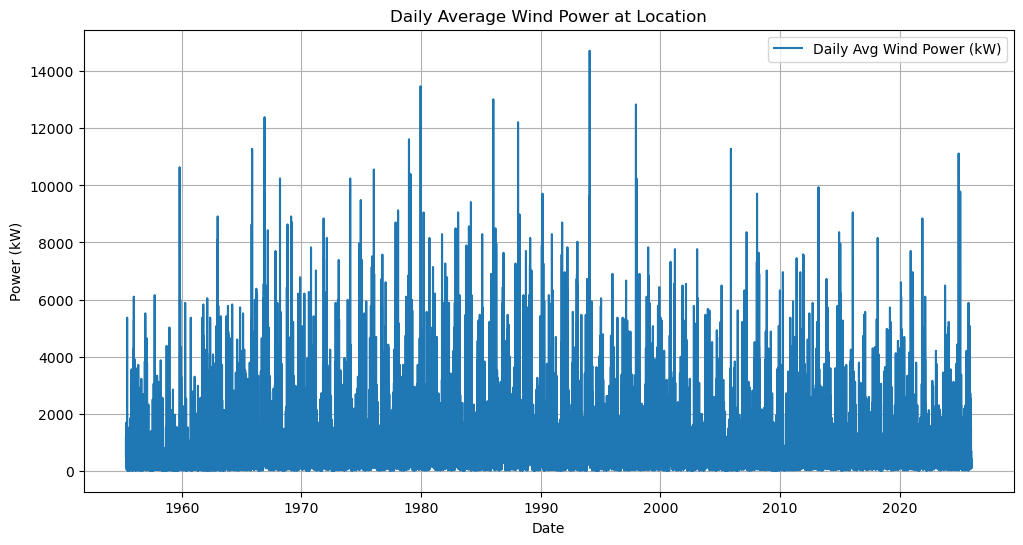

In [47]:
# now to plot the daily average wind power
df.set_index('Date_UTC', inplace=True)
daily_power = df['Power_kW'].resample('D').mean()

plt.figure(figsize=(12,6))
plt.plot(daily_power, label='Daily Avg Wind Power (kW)')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.title('Daily Average Wind Power at Location')
plt.legend()
plt.grid(True)
plt.show()

25568


1956-01-01 00:00:00 1958-12-11 12:00:00
25813



print(df.info())print(df.columns)

    Quick stats on wind speed:

print(df['wind_speed'].describe())

    Plot a histogram of wind speeds:

plt.figure(figsize=(8,5))
sns.histplot(df['wind_speed'], bins=30, kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()